# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy import stats
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

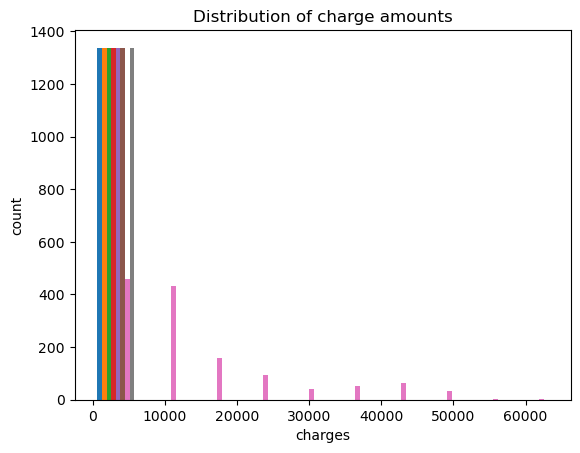

In [4]:
_ = plt.hist(medical)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Distribution of charge amounts')

In [5]:
charge_mean = np.mean(medical['charges'])
charge_std = np.std(medical['charges'], ddof = 1)
charge_mean,charge_std

#This data is only a sample of the population; we cannot assume the distribution of the 
#population given this arbitrarily sample
# The mean and std deviation provide estimates for this sample only so we must be careful when using them to 
#infer population parameters
#The std deviation is almost as large as the mean and the histogram shows this distribution is 
#heavily skewed to the right

(13270.422265141257, 12110.011236693996)

In [6]:
medical['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ This concern can be addressed using a t statistic test because while we have a decent sample size of 1338 charges, the true population mean and std deviation are unknown. We can test to see where 12,000 falls in this sample of data to get an understanding of how it relates to the average. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

In [7]:
#Create a function to take samples of size n from data

seed(28)
def charge_sampler(data, n):
    return np.random.choice(data,n)

In [8]:
sample1 = charge_sampler(medical.charges,100)

In [9]:
#Create a list of 500 samples, where each samples has 100 draws from charges

seed(28)
samples_dist = []
for i in range(500):
    samples_dist.append(charge_sampler(medical.charges, 100))
    
    

In [10]:
#Create a list of means of each of the 500 samples

samples_dist_means = []

for i in range(len(samples_dist)):
    samples_dist_means.append(np.mean(samples_dist[i]))
    
    

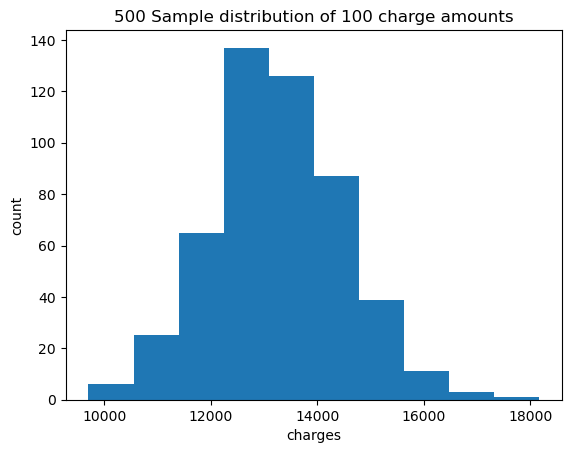

In [11]:
#Plot the distribution of samples means

_ = plt.hist(samples_dist_means)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('500 Sample distribution of 100 charge amounts')


#This appears to be normally distributed as expected from CLT

In [12]:
#Calculate mean from our distribution of samples

samples_dist_means_mean = np.mean(samples_dist_means)
print('Mean of 500 samples of 100 draws each is:', samples_dist_means_mean)

Mean of 500 samples of 100 draws each is: 13263.70696274472


In [13]:
#Calculate std deviation from our distribution of samples

samples_dist_means_std = np.std(samples_dist_means, ddof = 1)
print('Std deviation of 500 samples of 100 draws each is:', samples_dist_means_std)

Std deviation of 500 samples of 100 draws each is: 1221.677649633205


In [14]:
#Calculate the critical t-score for 95% confidence; this is a left tail test (testing if mean charge is below 12000)
t_score = t.ppf(q = 0.95,df = 499)
t_score

1.6479129840597062

In [15]:
#Calculate the margin of error (moe)

moe_t = (t.ppf(q = 0.95,df = 499)) * (np.sqrt((samples_dist_means_std **2) / len(samples_dist_means)))
print('The margine of error (95%) is:', moe_t)

The margine of error (95%) is: 90.03386665449854


In [16]:
#Use the margin of error and sample mean to find the confidence interval

print('The 95% confidence interval for the mean is between:',
      round(samples_dist_means_mean - moe_t),round(samples_dist_means_mean + moe_t))

The 95% confidence interval for the mean is between: 13174 13354


In [17]:
# The entire 95% confidence interval for the estimated population mean is above 12000, so the administrator does not
# need to be concerned because the average charge has not fallen below 12000 (95% confidence interval)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that there is no real difference in charges between people with insurance and people without

The alternative hypothesis is that there people with insurance are charged a different amount to those without


In [18]:
nonins_charges = medical[medical['insuranceclaim'] == 0]['charges']
ins_charges = medical[medical['insuranceclaim'] == 1]['charges']

In [19]:
#Use bootstrapping to create samples from noninsured and insured charges 
seed(28)

non_ins_sample = []
for i in range(500):
    non_ins_sample.append(charge_sampler(nonins_charges, 100))
    
ins_sample = []
for i in range(500):
    ins_sample.append(charge_sampler(ins_charges, 100))


In [20]:
#Create a list of means from each of these samples

non_ins_means = []
for i in range(len(non_ins_sample)):
    non_ins_means.append(np.mean(non_ins_sample[i]))
    
ins_means = []
for i in range(len(ins_sample)):
    ins_means.append(np.mean(ins_sample[i]))
    

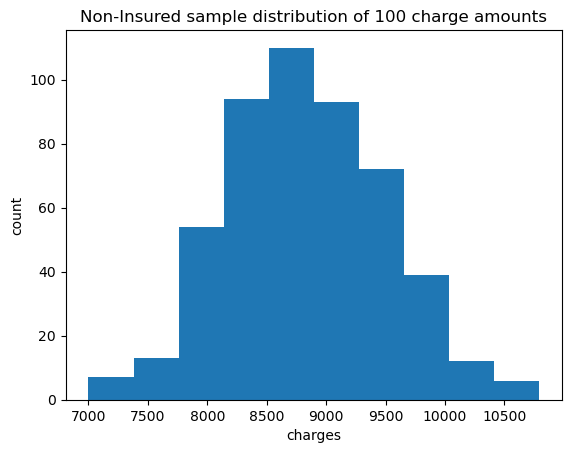

In [21]:
#Create histogram of sample means for non-insured charges 

_ = plt.hist(non_ins_means)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Non-Insured sample distribution of 100 charge amounts')


#Appears to be normally distributed

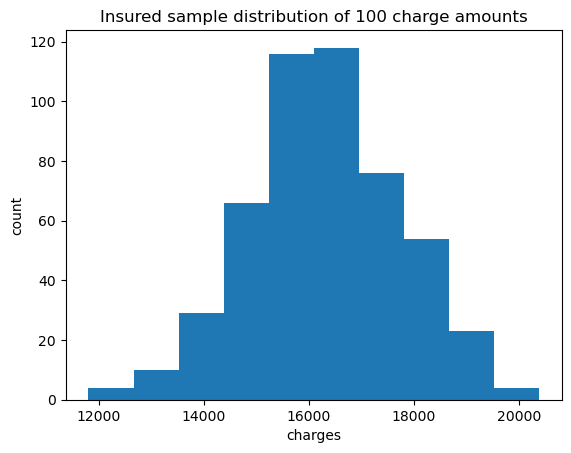

In [22]:
#Create histogram of sample means for insured charges 

_ = plt.hist(ins_means)
_ = plt.xlabel('charges')
_ = plt.ylabel('count')
_ = plt.title('Insured sample distribution of 100 charge amounts')

#Appears to be normally distributed also

In [23]:
#Calculate means and std devs for non-insured and insured samples

nonins_mean_val = np.mean(non_ins_means)
nonins_std_val = np.std(non_ins_means,ddof = 1)
print ('The mean and std deviation for non-insured charges:', nonins_mean_val,nonins_std_val)

ins_mean_val = np.mean(ins_means)
ins_std_val = np.std(ins_means,ddof = 1)
print ('The mean and std deviation for insured charges:', ins_mean_val,ins_std_val)

The mean and std deviation for non-insured charges: 8833.0320382244 664.3312704291033
The mean and std deviation for insured charges: 16312.140580910302 1457.539345809648


In [24]:
#Calculate the pooled standard deviation 

n0 = len(non_ins_means)
n1 = len(ins_means)


std_pooled = np.sqrt((((n0 - 1) * (nonins_std_val**2)) + ((n1 - 1) * (ins_std_val**2))) / (n0 + n1 -2))
print ('The pooled std deviation is:',std_pooled)

The pooled std deviation is: 1132.6422607013133


In [25]:
#Calculate t statistic


t_stat = (nonins_mean_val - ins_mean_val) / (std_pooled * (np.sqrt((1/n0 + 1/n1))))
print ('The t statistic value is :',t_stat)

The t statistic value is : -104.4063897450983


In [26]:
#We are assuming that non-insured and insured samples have identical variances

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.


__A:__ 

In [27]:
#Calculate t test statistic using scipy.stats

stats.ttest_ind(non_ins_means,ins_means)

Ttest_indResult(statistic=-104.40638974509831, pvalue=0.0)

In [28]:
#Verified that we got the same t value statistic manually (-104.4)

#The p value of 0 shows that the null hypothesis must be rejected, indicating that there is a signficant difference
# in how uninsured and insured are charged

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__  There is no z test to perform for independent samples. To perform z test, the population parameters need to be known in which case other tests can be performed using the parameters themselves rather than relying on the sample statistics. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test